### Do next
- read in all subjects' data (for-loop)
- read in ignacio bad trials matrix
- exclude bad trials
- use data

### This notebook preprocesses subjects 8 and 9 for Question 1: Can we predict if the subject will select Gamble or Safebet *before* the button press time?

## Behavior data

In [1]:
## Explore behavior data using pandas

import pandas as pd

beh_dir = '../data/decision-making/data/data_behav'

# os.listdir(beh_dir)

In [2]:
# S08
beh8_df = pd.read_csv(os.path.join(beh_dir,'gamble.data.s08.csv'))
beh9_df = pd.read_csv(os.path.join(beh_dir,'gamble.data.s09.csv'))

### Choice.class will be our outcome variable

In [3]:
beh8_df.groupby('choice.class').nunique()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome
choice.class,,,,,,,,,
Gamble,100,100,100,100,100,100,1,2,2
Safebet,100,100,100,100,100,100,1,2,2


In [4]:
beh9_df.groupby('choice.class').nunique()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome
choice.class,,,,,,,,,
Gamble,95,95,95,95,95,95,1,2,2
Safebet,105,105,105,105,105,105,1,2,2


### Notice that S09 does not have an equal number of trials between Gamble and Safebet.

In [6]:
y8 = beh8_df['choice.class'].values
y9 = beh9_df['choice.class'].values

Save y-data

In [9]:
mkdir ../data/decision-making/data/data_preproc

mkdir: ../data/decision-making/data/data_preproc: File exists


In [11]:
np.save('../data/decision-making/data/data_preproc/y8',y8)
np.save('../data/decision-making/data/data_preproc/y9',y9)

In [12]:
ls ../data/decision-making/data/data_preproc

Icon?   X8.npy  y8.npy  y9.npy


## Neural data

In [13]:
sfreq = 1000

neur_dir = '../data/decision-making/data/data_ephys'

# os.listdir(neur_dir)

from scipy.io import loadmat

neur8 = loadmat(os.path.join(neur_dir, 's08_ofc_hg_events.mat'))
neur9 = loadmat(os.path.join(neur_dir, 's09_ofc_hg_events.mat'))

In [14]:
neur8['buttonpress_events_hg'].shape

(200, 3001, 10)

In [15]:
neur9['buttonpress_events_hg'].shape

(200, 3001, 19)

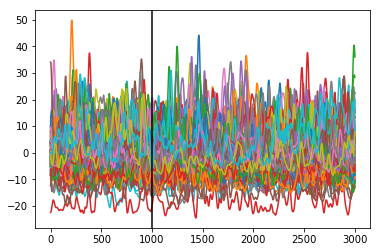

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# first electrode
plt.plot(neur8['buttonpress_events_hg'][:,:,0].T)
plt.axvline(1000, color='k')
pass

In [19]:
neur9['buttonpress_events_hg'].shape

(200, 3001, 19)

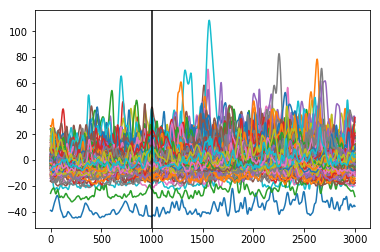

In [18]:
# first electrode
plt.plot(neur9['buttonpress_events_hg'][:,:,0].T)
plt.axvline(1000, color='k')
pass

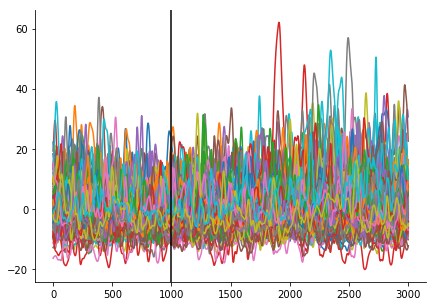

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,
                     figsize = (7,5))

ax.plot(neur8['buttonpress_events_hg'][:,:,1].T)
ax.axvline(1000, color='k')

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
pass

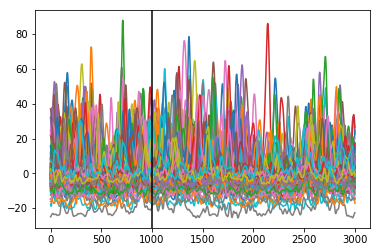

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

# 10th electrode
plt.plot(neur8['buttonpress_events_hg'][:,:,-1].T)
plt.axvline(1000, color='k')
pass

### Convert format of data to work for "decoding over time"

For decoding over time the data X is the epochs data of shape n_epochs x n_channels x n_times. As the last dimension of X is the time an estimator will be fit on every time instant.

In [35]:
neur8['buttonpress_events_hg'].shape

(200, 3001, 10)

In [22]:
neur9['buttonpress_events_hg'].shape

(200, 3001, 19)

### Notice that current shape is n_epochs (200) x n_times (3000) x n_channels (10)

In [36]:
X8 = np.swapaxes(neur8['buttonpress_events_hg'],1,2)

In [37]:
X8.shape

(200, 10, 3001)

In [23]:
X9 = np.swapaxes(neur9['buttonpress_events_hg'],1,2)

In [24]:
X9.shape

(200, 19, 3001)

Hooray, now it's n_epochs x n_channels x n_times.

## Save out X8 and X9

In [53]:
np.save('../data/decision-making/data/data_preproc/X8',X8)

In [25]:
np.save('../data/decision-making/data/data_preproc/X9',X9)